# **Benzeşim Yayılımı Kümeleme Tekniği**

***Benzeşim Yayılımı, yakınsama sağlanana kadar örnek çiftleri arasında mesajlar göndererek kümeler oluşturur. Daha sonra bir veri kümesi, diğer örnekleri en iyi temsil edenler olarak tanımlanan az sayıda örnek kullanılarak tanımlanır. Çiftler arasında gönderilen mesajlar, bir örneğin diğerinin örneği olma uygunluğunu temsil eder ve diğer çiftlerden gelen değerlere yanıt olarak güncellenir.***

***Bu güncelleme, yakınsama sağlanana kadar yinelemeli olarak gerçekleşir ve bu noktada nihai örnekler seçilir ve dolayısıyla nihai kümeleme verilir.***

# **Artıları ve Eksileri**

***Benzeşim Yayılımı, sağlanan verilere dayalı olarak küme sayısını otomatik olarak seçtiği için ilginç olabilir. Bu amaçla, iki önemli parametre, kaç örneğin kullanılacağını kontrol eden tercih ve bu mesajları güncellerken sayısal salınımları önlemek için sorumluluk ve kullanılabilirlik mesajlarını sönümleyen sönümleme faktörüdür.***

# **Bazı sentetik veriler oluşturun**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# Örnek veri oluşturun
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [8]:
X.shape

(300, 2)

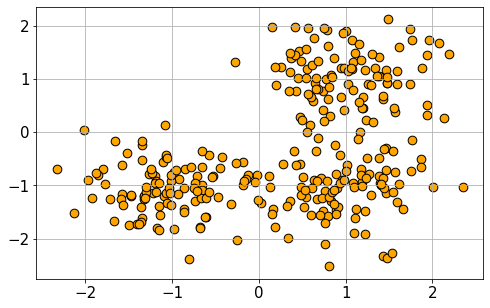

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1], edgecolors='k', c='orange', s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# **Kümeleme**

In [12]:
# Yakınlık Yayılımını Hesaplama
af_model = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af_model.cluster_centers_indices_
labels = af_model.labels_
n_clusters_ = len(cluster_centers_indices)

# **Tespit edilen kümelerin sayısı ve merkezleri**

In [13]:
print("Number of clusters detected by the algorithm:", n_clusters_)

Number of clusters detected by the algorithm: 3


In [14]:
print("Cluster centers detected at:\n\n", X[cluster_centers_indices])

Cluster centers detected at:

 [[ 1.03325861  1.15123595]
 [ 0.93494652 -0.95302339]
 [-1.18459092 -1.11968959]]


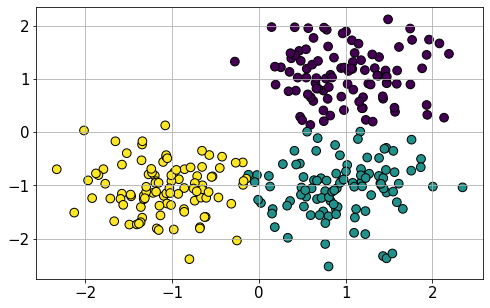

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c=af_model.labels_,s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# **Homojenlik**

***Bir temel gerçek verilen bir küme etiketlemesinin homojenlik metriği.***

***Bir kümeleme sonucu, tüm kümeleri yalnızca tek bir sınıfın üyesi olan veri noktalarını içeriyorsa homojenliği sağlar. Bu metrik etiketlerin mutlak değerlerinden bağımsızdır: sınıf veya küme etiket değerlerinin permütasyonu skor değerini hiçbir şekilde değiştirmez.***

In [19]:
print("Homogeneity score:", metrics.homogeneity_score(labels_true,labels))

Homogeneity score: 0.8715595298385134


# **Bütünlük**

***Bir temel gerçek verilen bir küme etiketlemesinin tamlık metriği.***

***Bir kümeleme sonucu, belirli bir sınıfın üyesi olan tüm veri noktaları aynı kümenin elemanlarıysa tamlığı sağlar. Bu metrik etiketlerin mutlak değerlerinden bağımsızdır: sınıf veya küme etiket değerlerinin permütasyonu skor değerini hiçbir şekilde değiştirmez.***

In [20]:
print("Completeness score:", metrics.completeness_score(labels_true, labels))

Completeness score: 0.8715859753374195


# **Tahmin**

In [21]:
x_new = [0.5,0.4]
x_pred = af_model.predict([x_new])[0]

In [ ]:
print("New point ({},{}) will belong to cluster {}")

# **Veri boyutu büyüdükçe zaman karmaşıklığı ve model kalitesi**

In [22]:
import time 
from tqdm import tqdm

In [26]:
n_samples = [10,20,50,100,200,500,1000,2000,3000,5000,7500,10000]
centers = [[1, 1], [-1, -1], [1, -1]]
t_aff = []
homo_aff=[]
complete_aff=[]

for i in tqdm(n_samples):
    X,labels_true = make_blobs(n_samples=i, centers=centers, cluster_std=0.5,random_state=0)
    t1 = time.time()
    af_model = AffinityPropagation(preference=-50,max_iter=50).fit(X)
    t2=time.time()
    t_aff.append(t2-t1)
    homo_aff.append(metrics.homogeneity_score(labels_true,af_model.labels_))
    complete_aff.append(metrics.completeness_score(labels_true,af_model.labels_))

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
 42%|████▏     | 5/12 [00:00<00:00, 23.07it/s]/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.8/dis

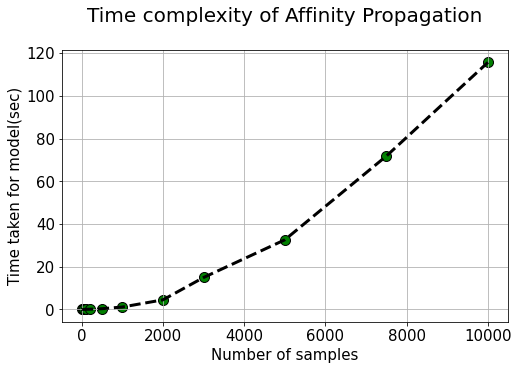

In [28]:
plt.figure(figsize=(8,5))
plt.title("Time complexity of Affinity Propagation\n", fontsize=20)
plt.scatter(n_samples, t_aff, edgecolors='k', c='green', s=100)
plt.plot(n_samples, t_aff, 'k--', lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples", fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Time taken for model(sec)", fontsize=15)
plt.show()

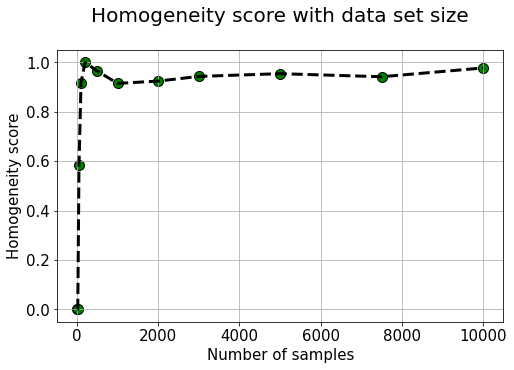

In [29]:
plt.figure(figsize=(8,5))
plt.title("Homogeneity score with data set size\n", fontsize=20)
plt.scatter(n_samples, homo_aff, edgecolors='k', c='green', s=100)
plt.plot(n_samples, homo_aff, 'k--', lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples", fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Homogeneity score", fontsize=15)
plt.show()

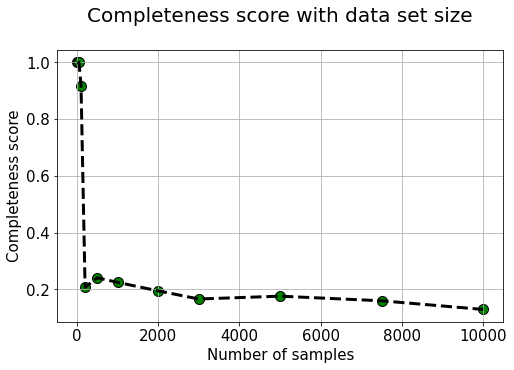

In [31]:
plt.figure(figsize=(8,5))
plt.title("Completeness score with data set size\n", fontsize=20)
plt.scatter(n_samples, complete_aff, edgecolors='k', c='green', s=100)
plt.plot(n_samples, complete_aff,'k--', lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples", fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Completeness score", fontsize=15)
plt.show()

# **Gürültü varlığında küme tespiti ne kadar iyi çalışır? Sönümleme yardımcı olabilir mi?**

***Farklı derecelerde gürültü std. dev ile veri kümeleri oluşturun ve kümeleri tespit etmek için modeli çalıştırın. Ayrıca, etkisini görmek için sönümleme parametresi ile oynayın.***

In [33]:
noise = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 1.75, 2.0]
n_clusters = []
for i in noise:
  centers = [[1, 1], [-1, -1], [1, -1]]
  X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std = i, random_state = 101)
  af_model = AffinityPropagation(preference = -50, max_iter = 500, convergence_iter = 15, damping = 0.5).fit(X)
  n_clusters.append(len(af_model.cluster_centers_indices_))

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:163: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagatio

Detected number of clusters: [200, 0, 160, 68, 1, 3, 3, 3, 4, 4, 5, 6, 6, 7, 9, 9]


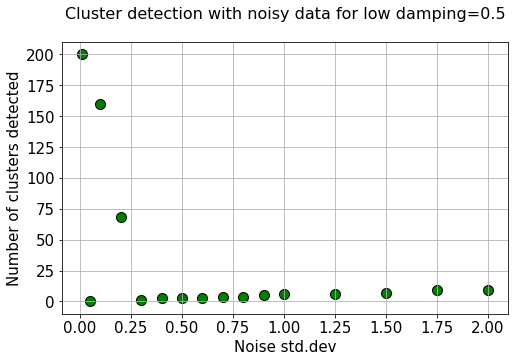

In [37]:
print("Detected number of clusters:", n_clusters)
plt.figure(figsize=(8,5))
plt.title("Cluster detection with noisy data for low damping=0.5\n", fontsize=16)
plt.scatter(noise, n_clusters, edgecolors='k', c = 'green', s = 100)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Noise std.dev", fontsize = 15)
plt.yticks(fontsize=15)
plt.ylabel("Number of clusters detected", fontsize=15)
plt.show()

In [38]:
noise = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 1.75, 2.0]
n_clusters = []
for i in noise:
  centers = [[1, 1], [-1, -1], [1, -1]]
  X, labels_true = make_blobs(n_samples = 200, centers=centers, cluster_std = i, random_state=101)
  af_model = AffinityPropagation(preference = -50, max_iter = 500, convergence_iter = 15, damping = 0.9).fit(X)
  n_clusters.append(len(af_model.cluster_centers_indices_))

Detected number of clusters: [3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 6, 6, 7]


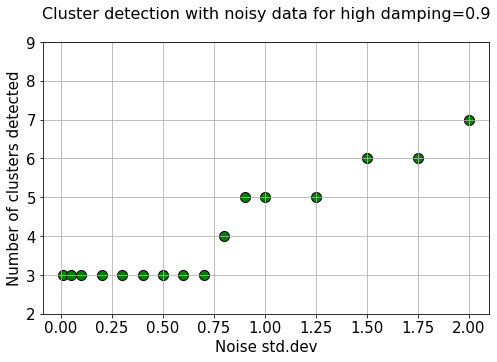

In [39]:
print("Detected number of clusters:", n_clusters)
plt.figure(figsize=(8,5))
plt.title("Cluster detection with noisy data for high damping=0.9\n", fontsize=16)
plt.scatter(noise, n_clusters, edgecolors='k', c = 'green', s = 100)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Noise std.dev", fontsize = 15)
plt.yticks([i for i in range(2, 10)], fontsize=15)
plt.ylabel("Number of clusters detected", fontsize=15)
plt.show()

***Düşük sönümleme faktörünün salınımlı tahminler yarattığı için küme tespiti için iyi olmadığını görüyoruz. Daha yüksek sönümleme tahmini sabitler. Düşük gürültü std. dev için tahmin doğrudur ve daha yüksek gürültü için yavaşça sapar.***